Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [3]:
X, y = load_boston(return_X_y=True)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [5]:
y = y.reshape(506,1)

In [6]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

#### Не понимаю почему появляется отрицательный результат

In [7]:
# Обучим полиноминальрую регрессия 

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

model = LinearRegression(normalize =True)

for i in range(20):
    rand_state = np.random.randint(100) # Генерация случайного числа для random state
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=rand_state) # Разбиение датасета на обучаемую и тестовую выборку
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = model.score(X_test,y_test)
    rmse  = np.sqrt(mean_squared_error(y_test,predictions))
    r2 = r2_score(y_test,predictions)
    
    print('Accuracy: {}, RMSE: {}, R2: {}'.format(round(accuracy, 5), round(rmse, 5), round(r2, 5)))
    

Accuracy: 0.71507, RMSE: 0.23842, R2: 0.71507
Accuracy: 0.60747, RMSE: 0.25169, R2: 0.60747
Accuracy: 0.85552, RMSE: 0.1428, R2: 0.85552
Accuracy: 0.87882, RMSE: 0.14622, R2: 0.87882
Accuracy: 0.72229, RMSE: 0.21354, R2: 0.72229
Accuracy: 0.82998, RMSE: 0.16169, R2: 0.82998
Accuracy: 0.87513, RMSE: 0.13727, R2: 0.87513
Accuracy: 0.83231, RMSE: 0.16584, R2: 0.83231
Accuracy: 0.84112, RMSE: 0.18471, R2: 0.84112
Accuracy: 0.37792, RMSE: 0.23945, R2: 0.37792
Accuracy: 0.78318, RMSE: 0.20042, R2: 0.78318
Accuracy: 0.84666, RMSE: 0.1661, R2: 0.84666
Accuracy: 0.8729, RMSE: 0.13934, R2: 0.8729
Accuracy: 0.65997, RMSE: 0.2329, R2: 0.65997
Accuracy: 0.83768, RMSE: 0.16898, R2: 0.83768
Accuracy: 0.87413, RMSE: 0.1595, R2: 0.87413
Accuracy: 0.81312, RMSE: 0.17208, R2: 0.81312
Accuracy: 0.86194, RMSE: 0.15995, R2: 0.86194
Accuracy: 0.03667, RMSE: 0.35451, R2: 0.03667
Accuracy: 0.66384, RMSE: 0.22621, R2: 0.66384


Усредняем полученное качество на каждой из выборок для оценки итогового качества модели с помощью кросс-валидации

In [8]:
from sklearn.model_selection import cross_val_score

#### Не понимаю почему результат отрицательный, даже если брать не X_poly, А просто X, то результат все равно не очень хороший, пробовал разные CV= и при X_poly пробовал разные значение degree=

In [9]:

results = cross_val_score(model, X_poly, y, cv=10)
print(results)
print('Average result: {}'.format(round(np.mean(results), 3)))

[-5.48956296e-02  6.57314357e-01 -8.86155817e-01  6.43531144e-01
 -3.20515297e+00 -2.67150344e+02 -3.75085076e-01 -1.07930802e+00
 -4.87195783e+00 -3.14501749e+00]
Average result: -27.947


In [10]:
from sklearn.neighbors import KNeighborsRegressor


In [11]:
# Оставлю нормализованные данные, с ними результат лучше
for i in range(20):
    rand_state = np.random.randint(100) # Генерация случайного числа для random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand_state) # Разбиение датасета на обучаемую и тестовую выборку
    # Обучение модели Knn
    model = KNeighborsRegressor(n_neighbors=3) 
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse  = np.sqrt(mean_squared_error(y_test,predictions))
    r2 = r2_score(y_test,predictions)
    accuracy = model.score(X_test, y_test) # Оценка качества модели
    print('Accuracy: {}, RMSE: {}, R2: {}'.format(round(accuracy, 3), round(rmse, 3), round(r2, 3)))

Accuracy: 0.783, RMSE: 0.195, R2: 0.783
Accuracy: 0.725, RMSE: 0.219, R2: 0.725
Accuracy: 0.797, RMSE: 0.19, R2: 0.797
Accuracy: 0.74, RMSE: 0.228, R2: 0.74
Accuracy: 0.789, RMSE: 0.186, R2: 0.789
Accuracy: 0.67, RMSE: 0.223, R2: 0.67
Accuracy: 0.818, RMSE: 0.154, R2: 0.818
Accuracy: 0.701, RMSE: 0.22, R2: 0.701
Accuracy: 0.81, RMSE: 0.178, R2: 0.81
Accuracy: 0.771, RMSE: 0.206, R2: 0.771
Accuracy: 0.702, RMSE: 0.22, R2: 0.702
Accuracy: 0.737, RMSE: 0.199, R2: 0.737
Accuracy: 0.798, RMSE: 0.18, R2: 0.798
Accuracy: 0.733, RMSE: 0.215, R2: 0.733
Accuracy: 0.811, RMSE: 0.179, R2: 0.811
Accuracy: 0.803, RMSE: 0.171, R2: 0.803
Accuracy: 0.783, RMSE: 0.191, R2: 0.783
Accuracy: 0.8, RMSE: 0.2, R2: 0.8
Accuracy: 0.757, RMSE: 0.196, R2: 0.757
Accuracy: 0.807, RMSE: 0.194, R2: 0.807


#### Опять результат при кросс валидации получается не очень

### Попрпобую продолжить с KNeighborsRegressor

In [21]:

model = KNeighborsRegressor(n_neighbors=3)
results = cross_val_score(model, X, y, cv=8)
print(results)
print('Average result: {}'.format(round(np.mean(results), 3)))

[0.60694289 0.24507148 0.31227324 0.35208976 0.35376368 0.05952744
 0.23328688 0.31873525]
Average result: 0.31


In [22]:
best_param = (3, 0.0)

for n_neigh in range(2, 30):
    model = KNeighborsRegressor(n_neighbors=n_neigh)
    results = cross_val_score(model, X, y, cv=8)
    avg_average = np.mean(results)
    print('Neighbors count: {}\tAverage result: {}'.format(n_neigh, round(avg_average, 3)))
    
    if avg_average > best_param[1]:
        best_param = (n_neigh, avg_average)

print('\nBest n_neighbors is {}'.format(best_param[0]))

Neighbors count: 2	Average result: 0.241
Neighbors count: 3	Average result: 0.31
Neighbors count: 4	Average result: 0.324
Neighbors count: 5	Average result: 0.324
Neighbors count: 6	Average result: 0.311
Neighbors count: 7	Average result: 0.304
Neighbors count: 8	Average result: 0.279
Neighbors count: 9	Average result: 0.272
Neighbors count: 10	Average result: 0.265
Neighbors count: 11	Average result: 0.264
Neighbors count: 12	Average result: 0.266
Neighbors count: 13	Average result: 0.274
Neighbors count: 14	Average result: 0.276
Neighbors count: 15	Average result: 0.266
Neighbors count: 16	Average result: 0.254
Neighbors count: 17	Average result: 0.244
Neighbors count: 18	Average result: 0.241
Neighbors count: 19	Average result: 0.23
Neighbors count: 20	Average result: 0.228
Neighbors count: 21	Average result: 0.217
Neighbors count: 22	Average result: 0.213
Neighbors count: 23	Average result: 0.207
Neighbors count: 24	Average result: 0.201
Neighbors count: 25	Average result: 0.185
Ne

In [23]:
from sklearn.model_selection import GridSearchCV

In [26]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=8, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=8, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='r2')

In [27]:
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.001001596450805664
std_fit_time : 8.766544490265958e-06
mean_score_time : 0.0009964406490325928
std_score_time : 2.1422459930154023e-06
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 0.45790449156066304
split1_test_score : 0.036229604554498196
split2_test_score : 0.315833877540723
split3_test_score : 0.5249311177216829
split4_test_score : 0.09379975177909061
split5_test_score : 0.1912814801530741
split6_test_score : -0.20115641467814882
split7_test_score : -2.208410440336393
mean_test_score : -0.0986983164631012
std_test_score : 0.8269892333827314
rank_test_score : 30


In [28]:
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[-0.09869832  0.24101746  0.31021133  0.32442056  0.32404294  0.31096961
  0.30427868  0.27944593  0.27172337  0.26544867  0.26432974  0.26568342
  0.27423336  0.27569249  0.26637395  0.25430429  0.24438887  0.24051634
  0.23000163  0.22819266  0.21689596  0.2134844   0.20685328  0.20093415
  0.18505702  0.17667742  0.16882141  0.1543636   0.14999412  0.14400003]


In [29]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cross-Validated Accuracy')

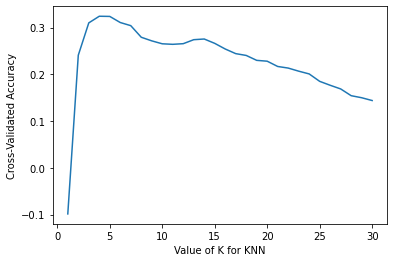

In [30]:
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [31]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.3244205556611143
{'n_neighbors': 4}
KNeighborsRegressor(n_neighbors=4)
